<a href="https://colab.research.google.com/github/sappy04/EDA/blob/main/22BCE2178_DA_THEORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd

# 1. Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# 2. Display column names
print("\n Column Names:", df.columns.tolist())

# 3. Display the first and last 10 rows
print("\n First 10 rows:")
print(df.head(10))

print("\n Last 10 rows:")
print(df.tail(10))

# 4. Check the structure and summary statistics
print("\n Dataset Info:")
df.info()  # No need for print(), it automatically prints output

print("\n Summary Statistics:")
print(df.describe(include='all'))  # Includes categorical columns too

# 5. Identify the number of rows and columns
print("\n Number of Rows and Columns:", df.shape)

# 6. Convert categorical variables into 'category' type
categorical_cols = ['Region', 'Item Type', 'Sales Channel']
for col in categorical_cols:
    if col in df.columns:  # Check if column exists
        df[col] = df[col].astype('category')

print("\n Categorical columns converted successfully!")



 Column Names: ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

 First 10 rows:
                              Region     Country   Item Type Sales Channel  \
0       Middle East and North Africa       Libya   Cosmetics       Offline   
1                      North America      Canada  Vegetables        Online   
2       Middle East and North Africa       Libya   Baby Food       Offline   
3                               Asia       Japan      Cereal       Offline   
4                 Sub-Saharan Africa        Chad      Fruits       Offline   
5                             Europe     Armenia      Cereal        Online   
6                 Sub-Saharan Africa     Eritrea      Cereal        Online   
7                             Europe  Montenegro     Clothes       Offline   
8  Central America and the Caribbean     Jamaica  Vegetables        

Column Names: ['index', 'Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

 Missing Values Count per Column:
 Order ID          0
Order Date        0
Ship Date         0
Units Sold        1
Unit Price        1
Total Revenue     1
index             1
Region            1
Country           1
Item Type         1
Sales Channel     1
Order Priority    1
Unit Cost         1
Total Cost        1
Total Profit      1
dtype: int64

 Total Missing Values: 12

 Missing Values Distribution:
 Order ID          0
Order Date        0
Ship Date         0
Units Sold        1
Unit Price        1
Total Revenue     1
index             1
Region            1
Country           1
Item Type         1
Sales Channel     1
Order Priority    1
Unit Cost         1
Total Cost        1
Total Profit      1
dtype: int64

 Proportion of Missing Values:
 Order ID          0.000000

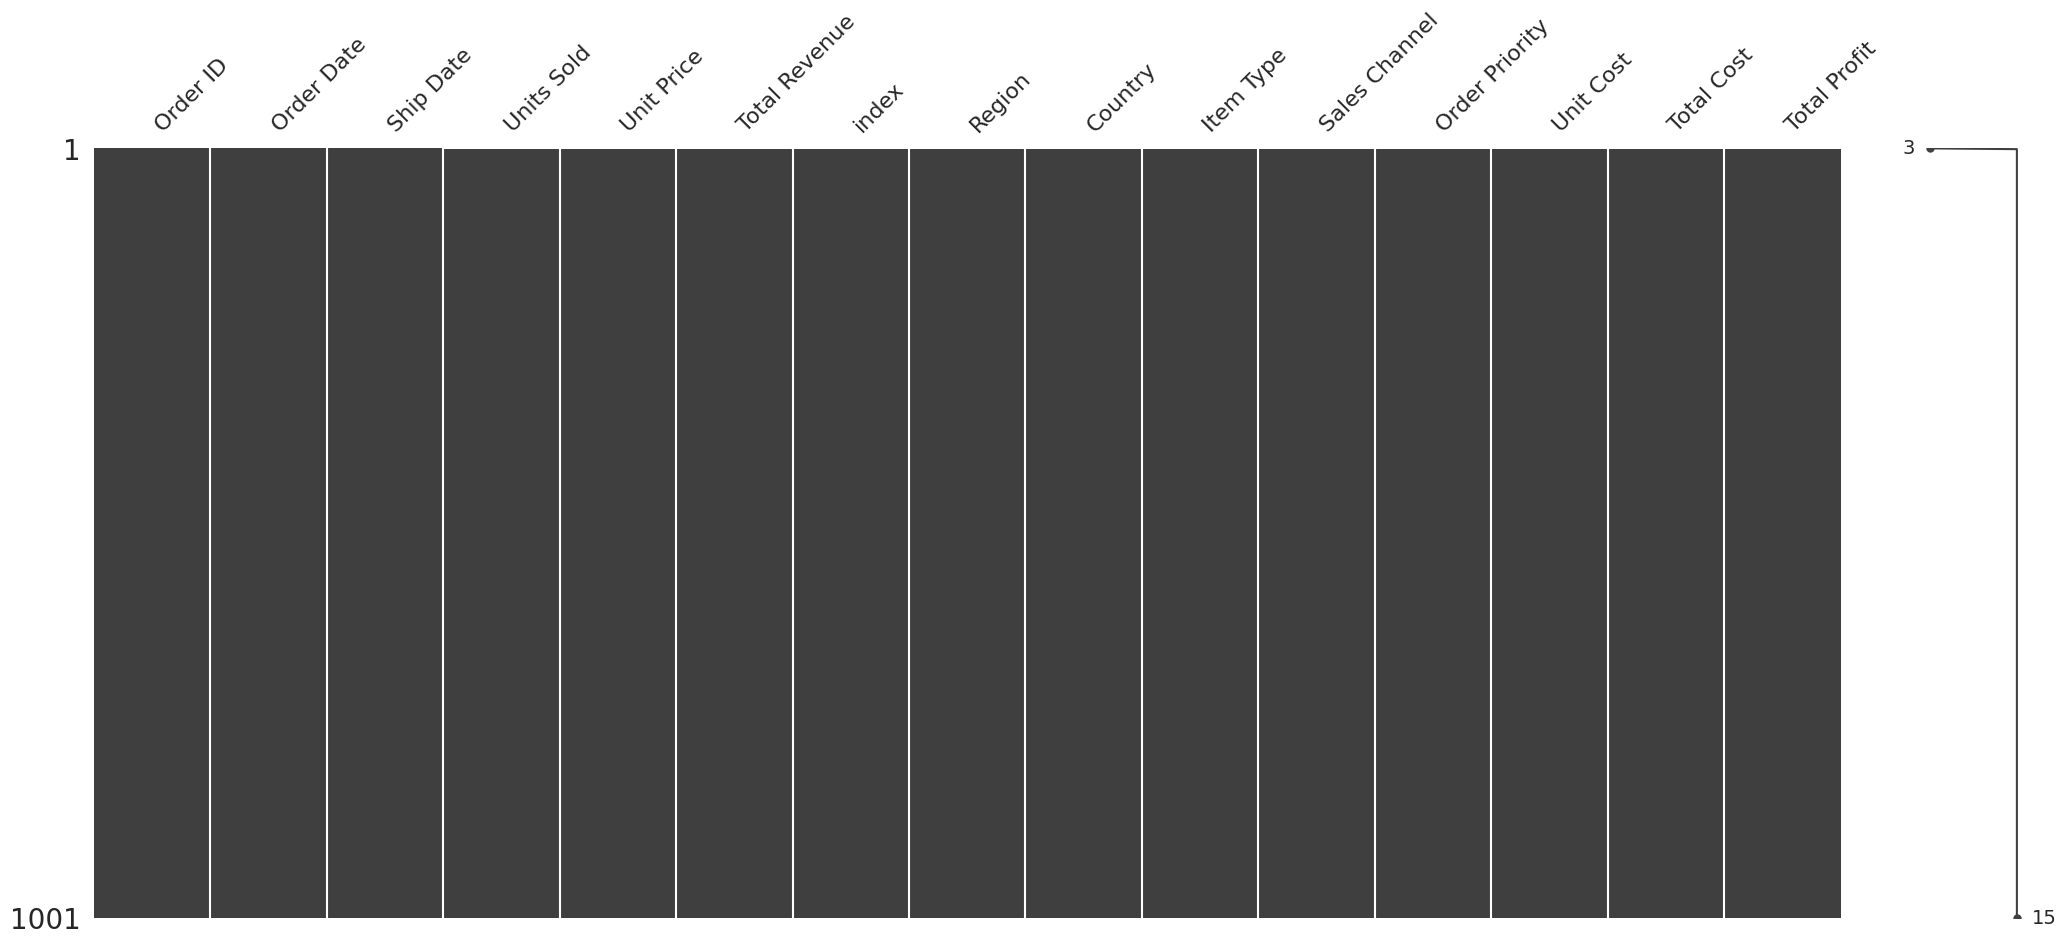


Missing values removed successfully!


In [70]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 6. Insert a new row as the first record
# Check actual column names first
print("Column Names:", df.columns.tolist())

# Create a new row with correct data types
new_row = pd.DataFrame([{
    "Order ID": "SAPTARSHI_DEB",
    "Order Date": "22BCE2178",
    "Ship Date": "22BCE2178",
    "Units Sold": np.nan,  # Using NaN for numeric fields
    "Unit Price": np.nan,
    "Total Revenue": np.nan
}])

# Concatenate the new row at the top
df = pd.concat([new_row, df], ignore_index=True)

# 7. Check if there are any missing values
print("\n Missing Values Count per Column:\n", df.isna().sum())

# 8. Find the total number of missing values and their distribution across columns
print("\n Total Missing Values:", df.isna().sum().sum())
print("\n Missing Values Distribution:\n", df.isna().sum())

# 9. Find the proportion of missing values in each column
print("\n Proportion of Missing Values:\n", df.isna().mean())

# 10. Visualize missing values using a missing value plot
print("\n Missing Values Visualization - 22BCE2178 :")
msno.matrix(df)
plt.show()

# 11. Perform row-wise deletion of missing values
df.dropna(inplace=True)  # Directly modify df
print("\nMissing values removed successfully!")


In [69]:
import pandas as pd

#  Ensure column names are clean (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# 12. Create a new dataframe SalesData
sales_data = df[['Order ID', 'Item Type', 'Unit Price', 'Total Revenue']].head(5)
print("\n Sales Data (First 5 Records):\n", sales_data)

# 13. Create another dataframe LocationData
location_data = df[['Order ID', 'Region', 'Country']].head(5)
print("\n Location Data (First 5 Records):\n", location_data)

# 14. Correctly append the two dataframes
combined_data = pd.concat([sales_data, location_data], axis=1)  # Append horizontally (column-wise)
print("\n Combined Data (SalesData + LocationData):\n", combined_data)

# 15. Merge the two dataframes using Order ID as the common key
merged_data = pd.merge(sales_data, location_data, on="Order ID")
print("\n Merged Data (Using Order ID as Key):\n", merged_data)

# 16. Perform Left Join and Right Join
left_join = pd.merge(sales_data, location_data, on="Order ID", how="left")
right_join = pd.merge(sales_data, location_data, on="Order ID", how="right")
print("\n Left Join Result:\n", left_join)
print("\n Right Join Result:\n", right_join)

# 17. Check if 'Total Profit' column exists before filtering
if 'Total Profit' in df.columns:
    filtered_data = df[df['Total Profit'] > 10000]
    print("\n Filtered Data (Total Profit > 10000):\n", filtered_data.head())
else:
    print("\n 'Total Profit' column not found. Skipping filtering step.")

# 18. Sort the dataset based on Total Revenue in descending order
if 'Total Revenue' in df.columns:
    sorted_data = df.sort_values(by="Total Revenue", ascending=False)
    print("\n Sorted Data (By Total Revenue, Descending):\n", sorted_data.head())
else:
    print("\n 'Total Revenue' column not found. Skipping sorting step.")



 Sales Data (First 5 Records):
     Order ID   Item Type  Unit Price  Total Revenue
0  686800706   Cosmetics      437.20     3692591.20
1  185941302  Vegetables      154.06      464953.08
2  246222341   Baby Food      255.28      387259.76
3  161442649      Cereal      205.70      683335.40
4  645713555      Fruits        9.33       91853.85

 Location Data (First 5 Records):
     Order ID                        Region Country
0  686800706  Middle East and North Africa   Libya
1  185941302                 North America  Canada
2  246222341  Middle East and North Africa   Libya
3  161442649                          Asia   Japan
4  645713555            Sub-Saharan Africa    Chad

 Combined Data (SalesData + LocationData):
     Order ID   Item Type  Unit Price  Total Revenue   Order ID  \
0  686800706   Cosmetics      437.20     3692591.20  686800706   
1  185941302  Vegetables      154.06      464953.08  185941302   
2  246222341   Baby Food      255.28      387259.76  246222341   
3  1

In [36]:
import pandas as pd
import json  # For better structured output

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# 19. Mean, median, standard deviation, min, max for Unit Price
if 'Unit Price' in df.columns:
    unit_price_stats = {
        "Mean": df['Unit Price'].mean(skipna=True),
        "Median": df['Unit Price'].median(skipna=True),
        "Std Dev": df['Unit Price'].std(skipna=True),
        "Min": df['Unit Price'].min(skipna=True),
        "Max": df['Unit Price'].max(skipna=True)
    }
    print("\n Unit Price Stats:\n", json.dumps(unit_price_stats, indent=4))
else:
    print("\n 'Unit Price' column not found. Skipping stats calculation.")

# 20. Compute IQR and quantiles for Total Revenue
if 'Total Revenue' in df.columns:
    iqr = df['Total Revenue'].quantile(0.75) - df['Total Revenue'].quantile(0.25)
    quantiles = df['Total Revenue'].quantile([0.25, 0.5, 0.75])
    print("\n IQR of Total Revenue:", iqr)
    print("\n Quantiles of Total Revenue:\n", quantiles)
else:
    print("\n 'Total Revenue' column not found. Skipping IQR calculation.")

# 21. Correlation between Total Cost, Total Revenue, and Total Profit
required_cols = ['Total Cost', 'Total Revenue', 'Total Profit']
if all(col in df.columns for col in required_cols):
    correlation_matrix = df[required_cols].dropna().corr()
    print("\n Correlation Matrix:\n", correlation_matrix)
else:
    print("\n Some required columns for correlation are missing. Skipping correlation matrix.")

# 22. Item Type with the highest total revenue
if 'Item Type' in df.columns and 'Total Revenue' in df.columns:
    highest_revenue_item = df.groupby('Item Type', observed=True)['Total Revenue'].sum().idxmax()
    print("\n Item Type with Highest Revenue:", highest_revenue_item)
else:
    print("\n 'Item Type' or 'Total Revenue' column not found. Skipping highest revenue item calculation.")

# 23. Region with the highest sales
if 'Region' in df.columns and 'Units Sold' in df.columns:
    highest_sales_region = df.groupby('Region', observed=True)['Units Sold'].sum().idxmax()
    print("\n Region with Highest Sales:", highest_sales_region)
else:
    print("\n 'Region' or 'Units Sold' column not found. Skipping highest sales region calculation.")




 Unit Price Stats:
 {
    "Mean": 262.10684,
    "Median": 154.06,
    "Std Dev": 216.02106046304345,
    "Min": 9.33,
    "Max": 668.27
}

 IQR of Total Revenue: 1452310.85

 Quantiles of Total Revenue:
 0.25     281191.90
0.50     754939.18
0.75    1733502.75
Name: Total Revenue, dtype: float64

 Correlation Matrix:
                Total Cost  Total Revenue  Total Profit
Total Cost       1.000000       0.987779      0.797041
Total Revenue    0.987779       1.000000      0.881429
Total Profit     0.797041       0.881429      1.000000

 Item Type with Highest Revenue: Office Supplies

 Region with Highest Sales: Sub-Saharan Africa


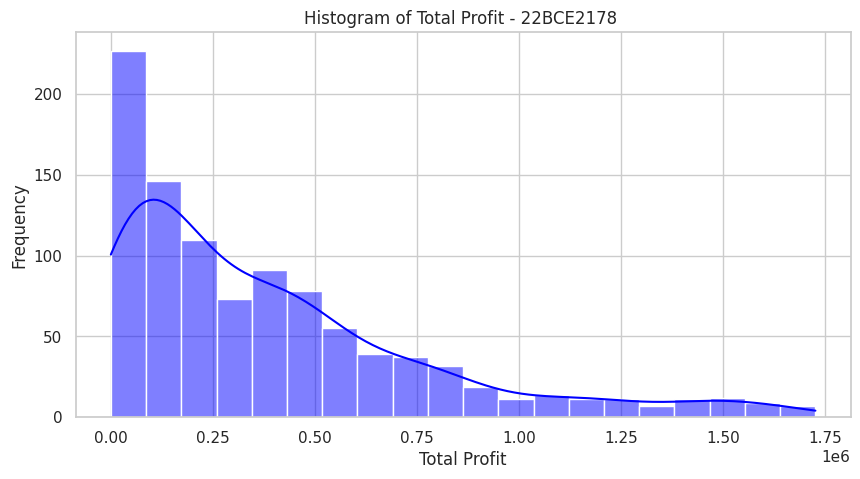

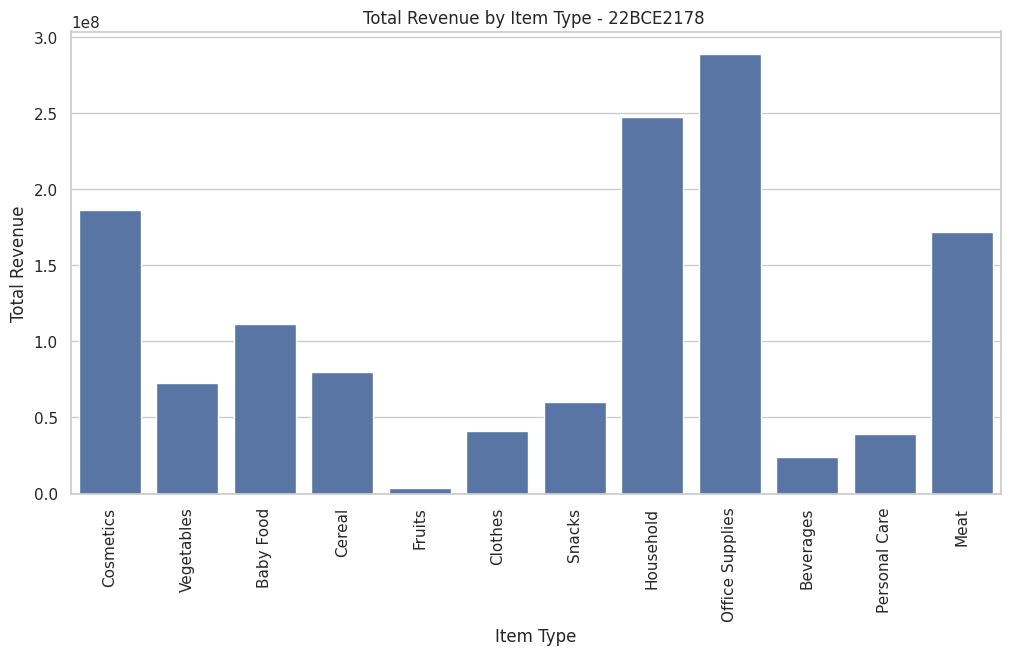

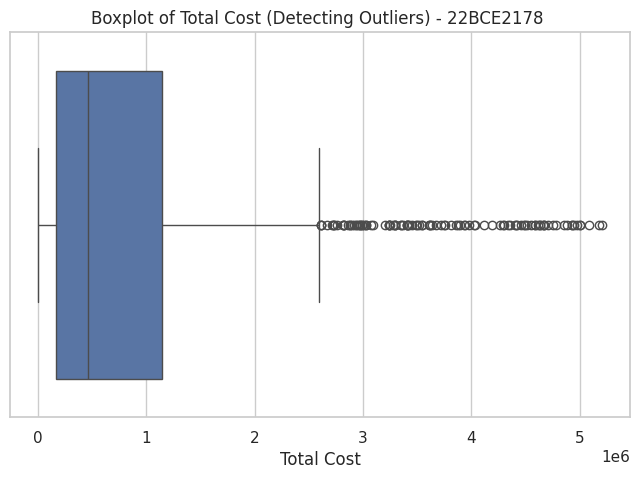

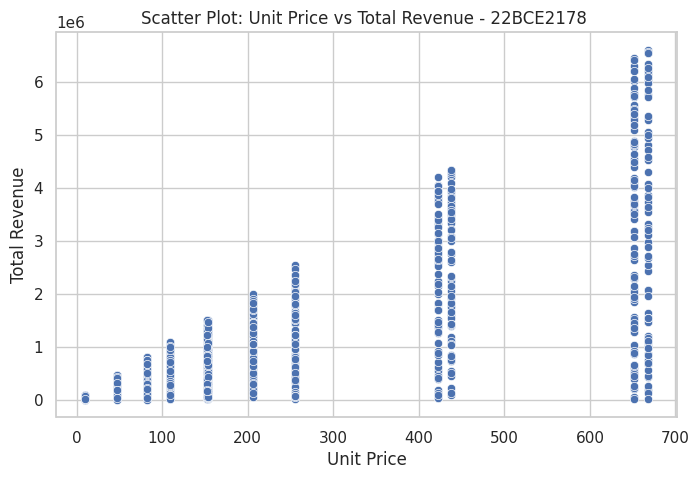

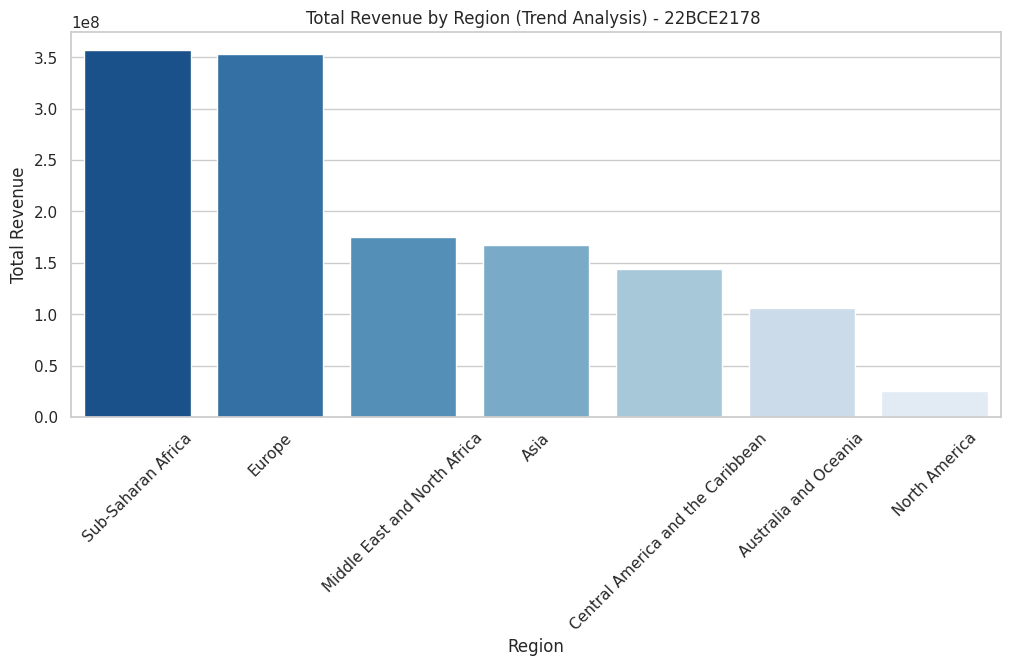

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Seaborn uses a clean theme
sns.set_theme(style="whitegrid")

# 24. Histogram of Total Profit
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Profit'].dropna(), bins=20, kde=True, color='blue')
plt.title("Histogram of Total Profit - 22BCE2178 ")
plt.xlabel("Total Profit")
plt.ylabel("Frequency")
plt.show()

# 25. Bar chart showing Total Revenue by Item Type (Summing Revenue)
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Total Revenue', data=df, estimator=sum, errorbar=None)  # ✅ Fixed deprecated ci
plt.xticks(rotation=90)
plt.title("Total Revenue by Item Type - 22BCE2178 ")
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.show()

# 26. Boxplot of Total Cost to detect outliers (Horizontal for readability)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total Cost'].dropna(), orient="h")
plt.title("Boxplot of Total Cost (Detecting Outliers) - 22BCE2178 ")
plt.xlabel("Total Cost")
plt.show()

# 27. Scatter plot of Unit Price vs Total Revenue (Handling missing values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df.dropna(subset=['Unit Price', 'Total Revenue']))
plt.title("Scatter Plot: Unit Price vs Total Revenue - 22BCE2178 ")
plt.xlabel("Unit Price")
plt.ylabel("Total Revenue")
plt.show()

# 28.  Trend Analysis (Using Region)

#  Trend Analysis by 'Region'
if 'Region' in df.columns:
    plt.figure(figsize=(12, 5))

    # Aggregate total revenue per region
    region_trend = df.groupby('Region', observed=True)['Total Revenue'].sum().reset_index()

    # Sort regions by revenue
    region_trend = region_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix: Assign `hue=x` and `legend=False`
    sns.barplot(x='Region', y='Total Revenue', hue='Region', data=region_trend, palette="Blues_r", legend=False)

    plt.title("Total Revenue by Region (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Region")
    plt.xticks(rotation=45)
    plt.show()

#  Trend Analysis by 'Country'
elif 'Country' in df.columns:
    plt.figure(figsize=(12, 5))

    country_trend = df.groupby('Country', observed=True)['Total Revenue'].sum().reset_index()
    country_trend = country_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix applied here too
    sns.barplot(x='Country', y='Total Revenue', hue='Country', data=country_trend, palette="Greens_r", legend=False)

    plt.title("Total Revenue by Country (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Country")
    plt.xticks(rotation=45)
    plt.show()

#  Trend Analysis by 'Item Type'
elif 'Item Type' in df.columns:
    plt.figure(figsize=(12, 5))

    item_type_trend = df.groupby('Item Type', observed=True)['Total Revenue'].sum().reset_index()
    item_type_trend = item_type_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix applied here too
    sns.barplot(x='Item Type', y='Total Revenue', hue='Item Type', data=item_type_trend, palette="Reds_r", legend=False)

    plt.title("Total Revenue by Item Type (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Item Type")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("\n No suitable column found for trend analysis. Skipping plot.")


In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 30. Normalize function
def normalize_SalesData(data, new_min, new_max):
    scaler = MinMaxScaler(feature_range=(new_min, new_max))
    return scaler.fit_transform(data)

# Columns to normalize
columns_to_normalize = ['Unit Price', 'Total Revenue', 'Total Profit']

#  Ensure columns exist & drop NaN values before normalization
df_cleaned = df[columns_to_normalize].dropna()

# 31. Normalize to the range [0, 1]
normalized_data_01 = normalize_SalesData(df_cleaned.values, 0, 1)
normalized_df_01 = pd.DataFrame(normalized_data_01, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [0, 1]):\n", normalized_df_01.head().round(4))

# 32. Normalize to the range [-1, 1]
normalized_data_neg11 = normalize_SalesData(df_cleaned.values, -1, 1)
normalized_df_neg11 = pd.DataFrame(normalized_data_neg11, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [-1, 1]):\n", normalized_df_neg11.head().round(4))

# 33. Normalize to the range [-3, 3]
normalized_data_neg33 = normalize_SalesData(df_cleaned.values, -3, 3)
normalized_df_neg33 = pd.DataFrame(normalized_data_neg33, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [-3, 3]):\n", normalized_df_neg33.head().round(4))



 Normalized Data (Range [0, 1]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.6493         0.5579        0.8507
2011-11-07      0.2196         0.0700        0.1101
2016-10-31      0.3733         0.0582        0.0840
2010-04-10      0.2980         0.1030        0.1702
2011-08-16      0.0000         0.0136        0.0134

 Normalized Data (Range [-1, 1]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.2987         0.1158        0.7014
2011-11-07     -0.5607        -0.8600       -0.7798
2016-10-31     -0.2535        -0.8835       -0.8321
2010-04-10     -0.4040        -0.7940       -0.6595
2011-08-16     -1.0000        -0.9728       -0.9731

 Normalized Data (Range [-3, 3]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.8960         0.3474        2.1041
2011-11-0

Chi-Square Test Results: 7.848940679847964 0.2493805586210492


<Figure size 1200x600 with 0 Axes>

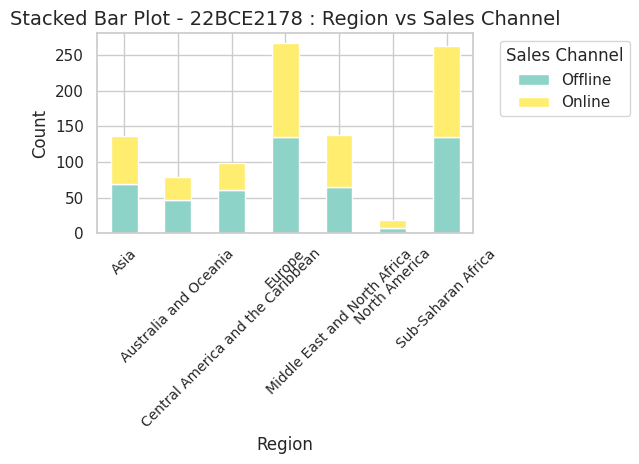

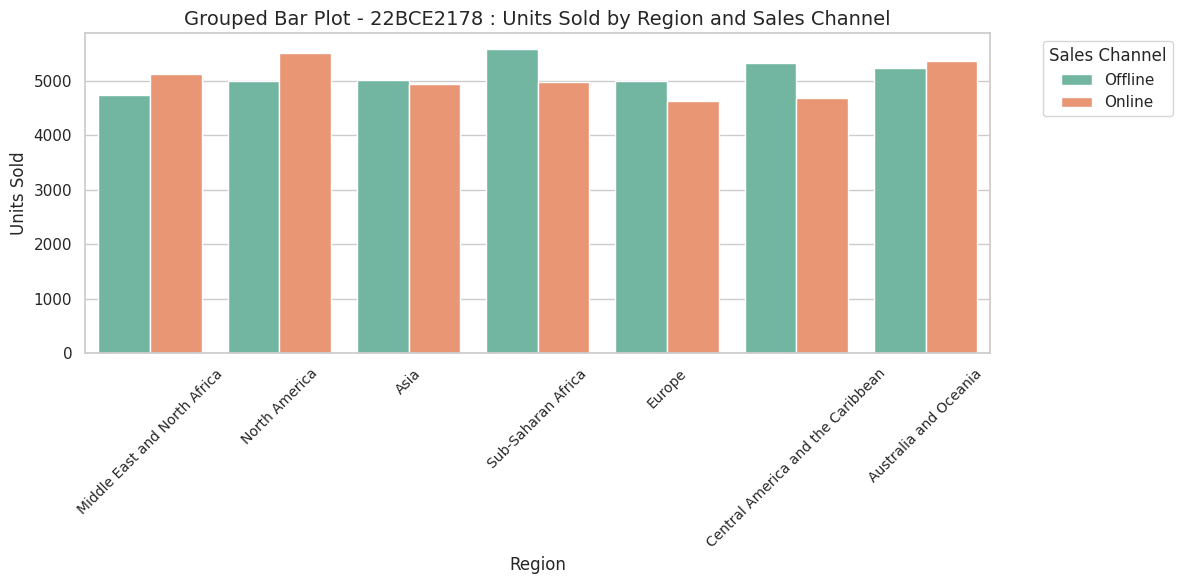

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 34. Contingency Tables
region_sales_channel_table = pd.crosstab(df['Region'], df['Sales Channel'])
units_sold_revenue_corr = df[['Units Sold', 'Total Revenue']].corr()

#   observed=True in groupby()
product_units_sold_agg = df.groupby('Item Type', observed=True)['Units Sold'].sum()

# 35. 3-Way Contingency Table
three_way_table = pd.crosstab([df['Region'], df['Sales Channel']], df['Item Type'])

# 36. Chi-Square Test
chi2, p, dof, expected = chi2_contingency(region_sales_channel_table)
print("Chi-Square Test Results:", chi2, p)

# 37. Stacked Bar Plot
plt.figure(figsize=(12, 6))
region_sales_channel_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Stacked Bar Plot - 22BCE2178 : Region vs Sales Channel", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 38. Grouped Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units Sold', hue='Sales Channel', data=df, errorbar=None, palette='Set2')
plt.title("Grouped Bar Plot - 22BCE2178 : Units Sold by Region and Sales Channel", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


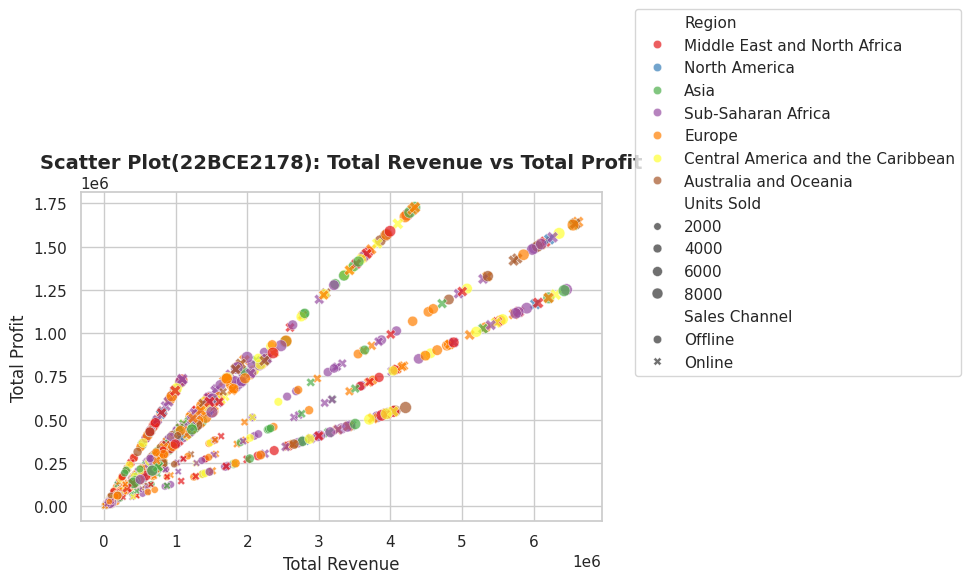

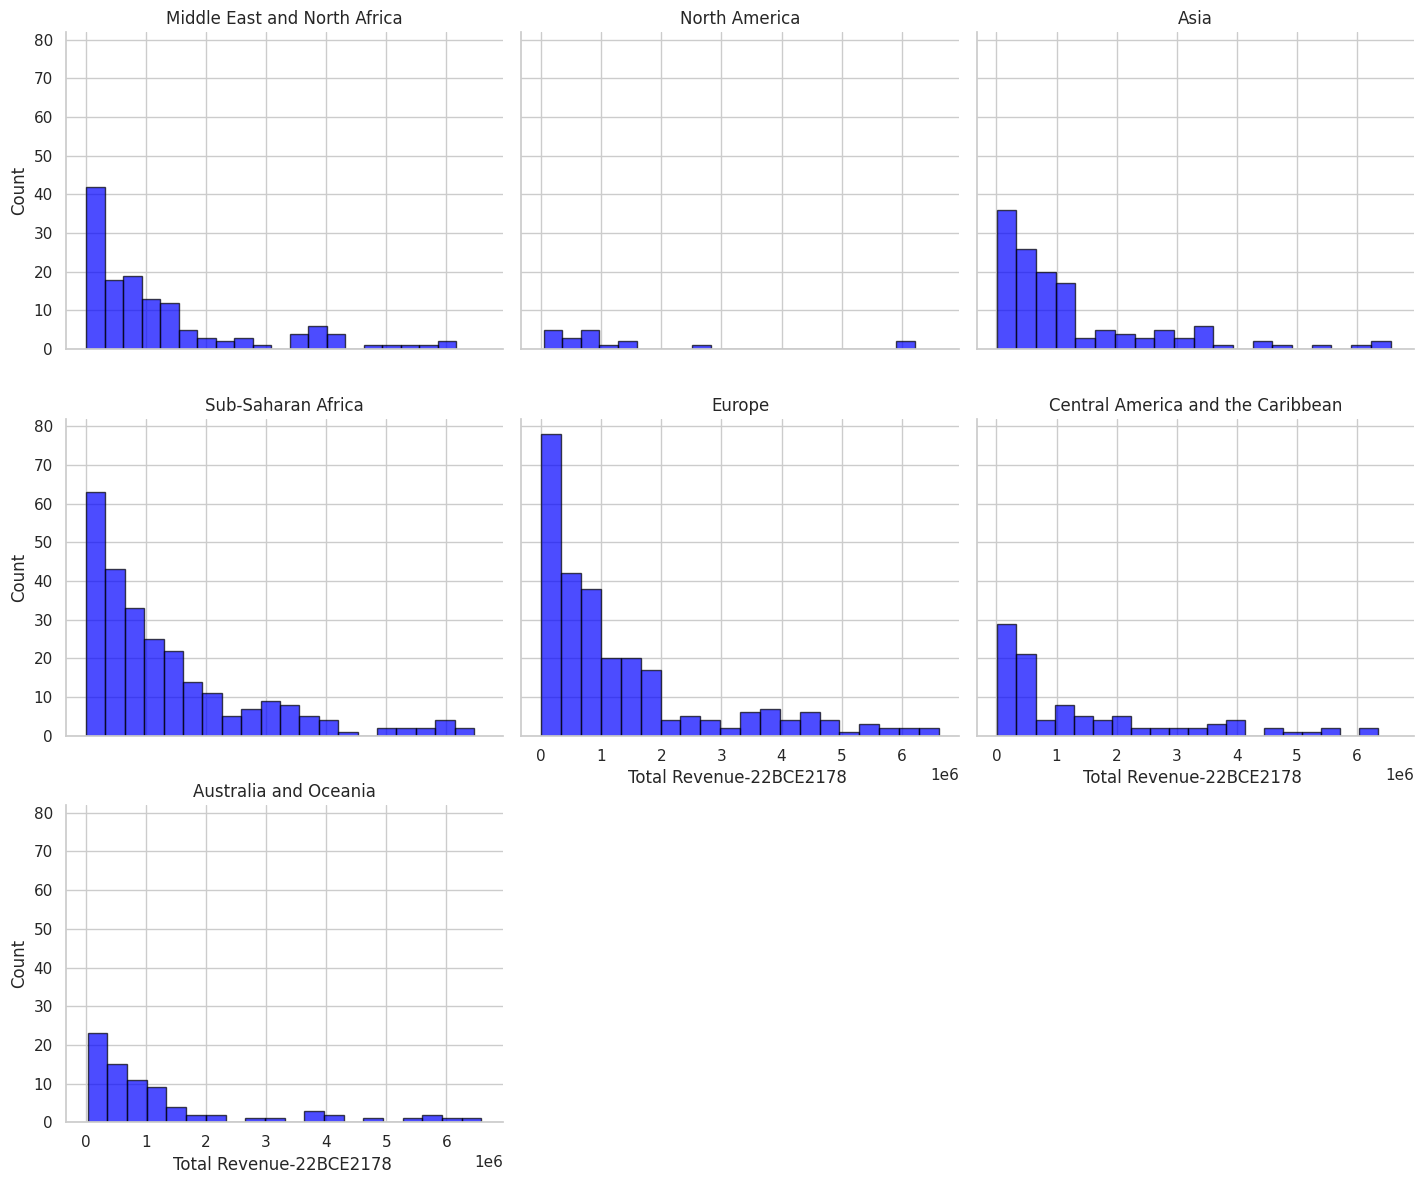

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df.reset_index()
#categorical variables are strings
df['Region'] = df['Region'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)

# Scatter Plot with better readability
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total Revenue',
    y='Total Profit',
    hue='Region',         # Color by Region
    style='Sales Channel',  # Shape by Sales Channel
    size='Units Sold',      # Size by Units Sold
    data=df,
    alpha=0.7,
    palette='Set1'
)
plt.title("Scatter Plot(22BCE2178): Total Revenue vs Total Profit", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='center left')
plt.tight_layout()
plt.show()


g = sns.FacetGrid(df, col='Region', col_wrap=3, height=4, aspect=1.2)
g.map(plt.hist, 'Total Revenue', bins=20, color='blue', edgecolor='black', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("Total Revenue-22BCE2178 ", "Count")
plt.tight_layout()
plt.show()


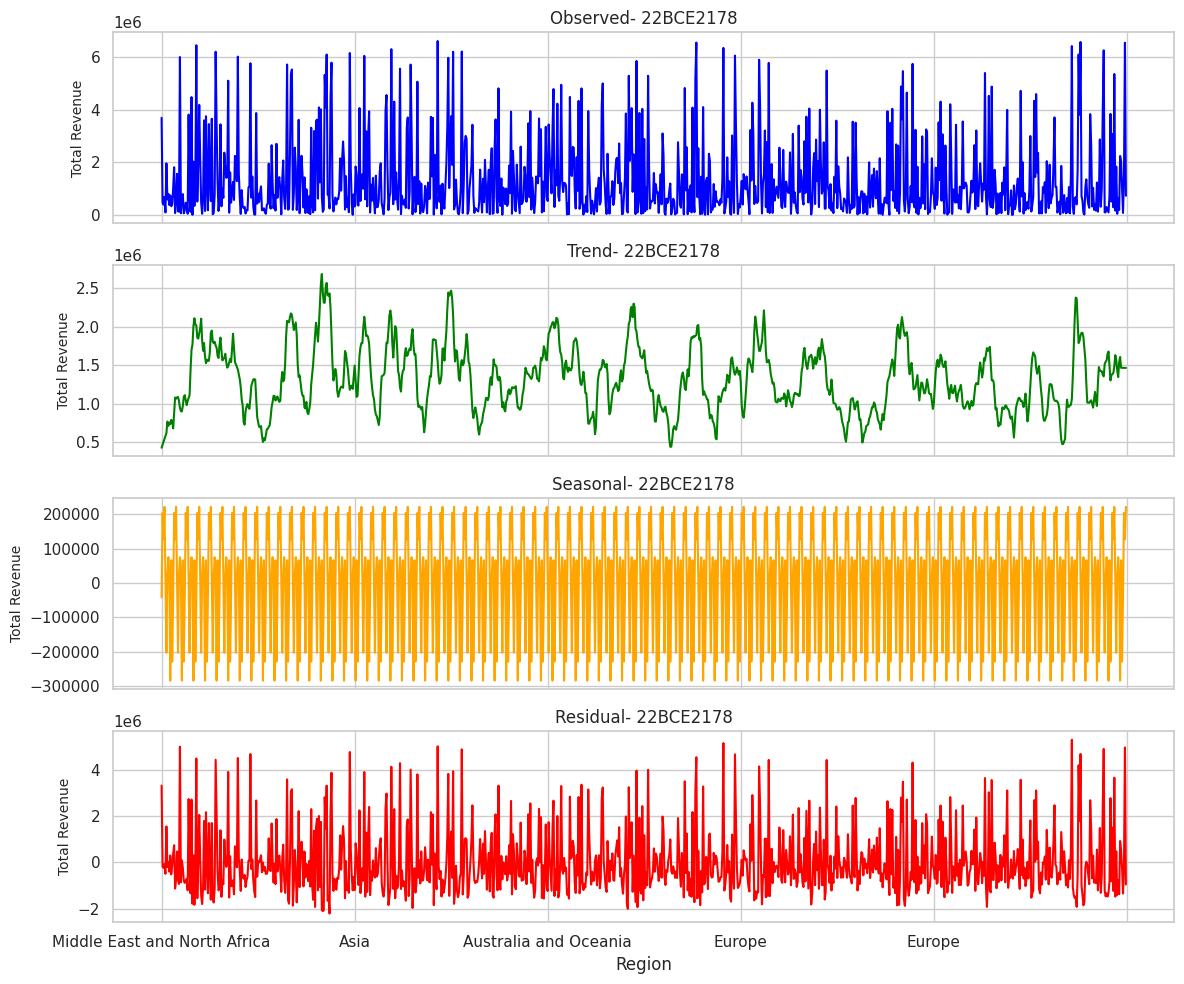

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

#  Replace 'Order Date' with a different existing column (e.g., 'Region')
df.set_index('Region', inplace=True)  # Using 'Region' as the index

# ✅ Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

#  Drop NaN values in 'Total Revenue'
df = df.dropna(subset=['Total Revenue'])

#  Perform time series decomposition (Using categorical index)
period = 12  # Default periodicity
result = seasonal_decompose(df['Total Revenue'], model='additive', period=period, extrapolate_trend='freq')

#  Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
result.observed.plot(ax=axes[0], color='blue')
axes[0].set_title("Observed- 22BCE2178", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=10)

# Trend
result.trend.plot(ax=axes[1], color='green')
axes[1].set_title("Trend- 22BCE2178", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=10)

# Seasonal
result.seasonal.plot(ax=axes[2], color='orange')
axes[2].set_title("Seasonal- 22BCE2178", fontsize=12)
axes[2].set_ylabel("Total Revenue", fontsize=10)

# Residual
result.resid.plot(ax=axes[3], color='red')
axes[3].set_title("Residual- 22BCE2178", fontsize=12)
axes[3].set_ylabel("Total Revenue", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


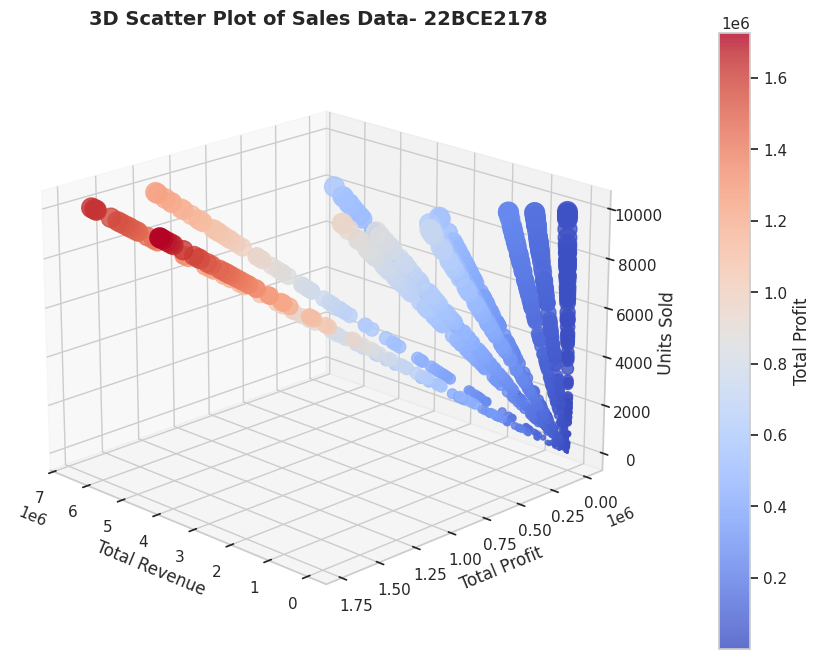

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#  Ensure there are no NaN values
df = df.dropna(subset=['Total Revenue', 'Total Profit', 'Units Sold'])

#  Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

#  Scatter plot with better color and size mapping
scatter = ax.scatter(
    df['Total Revenue'],
    df['Total Profit'],
    df['Units Sold'],
    c=df['Total Profit'],   #  Color by profit
    cmap='coolwarm',        #  Colormap for better visualization
    s=df['Units Sold'] / 50,  #  Scale points based on 'Units Sold'
    alpha=0.8
)

#  Labels
ax.set_xlabel('Total Revenue', fontsize=12)
ax.set_ylabel('Total Profit', fontsize=12)
ax.set_zlabel('Units Sold', fontsize=12)
ax.set_title('3D Scatter Plot of Sales Data- 22BCE2178', fontsize=14, fontweight='bold')

#  Add color bar for reference
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Total Profit', fontsize=12)

#  Adjust viewing angle for better clarity
ax.view_init(elev=20, azim=135)

plt.show()

